<a href="https://colab.research.google.com/github/irravasyuk/SQL_2/blob/master/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_text_classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання

* Завантажте усі датафрейми
* Добавте до кожного стовпчик `labels` з відповідним йому класом(bussiness, sports, education, etc). назви класів беріть з назв файлів
* Об'єднайте всі датафрейми в один, див [pd.concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)
* Створіть стовпчик `text` в якому зберігатиметься текст для подальшої роботи. Можети вибрати такі варіанти:
  * Взяти один зі стовпчиків `headline`, `description`, `content`
  * Об'єднати тексти зі стовпчиків `headline`, `description`, `content`
* Видаліть стовпчики `headline`, `description`, `content`, `url`
* Розділіть дані на тренувальні та тестові
* Застосуйте `TfidfVectorizer`
* Натренуйте модель
* Виведіть результати

**Додатково**
* У `MyTokenizer` добавте обробку тексту за допомогою `nltk`, застусуйте один з варіантів:
  * стематизація
  * лематизація(використайте `nltk.pos_tag` для визначення частини мови)
  * обидва варіанти
* Використайте `n-gram` для класифікації(можливо доведеться збільшити `max_features`)
* Натренуйте різні моделі:
  * [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
  * [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)
  * [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) з параметром `kernel="linear"`
  * [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) з параметром `kernel="rbf"`
  * [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)
* Використайте `optuna` для підбору гіперпараметрів


# Дані про статті

In [1]:
import pandas as pd

df1 = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/business_data.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/education_data.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/entertainment_data.csv")
df4 = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/sports_data.csv")
df5 = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/technology_data.csv")

In [2]:
data = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
data

,headlines,description,content,url,category
0,Nirmala Sitharaman to equal Morarji Desai’s re...,With the presentation of the interim budget on...,"Sitharaman, the first full-time woman finance ...",https://indianexpress.com/article/business/bud...,business
1,"‘Will densify network, want to be at least no....","'In terms of market share, we aim to double it...",The merger of Tata group’s budget airlines Air...,https://indianexpress.com/article/business/avi...,business
2,Air India group to induct an aircraft every si...,Air India currently has 117 operational aircra...,The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business
3,Red Sea woes: Exporters seek increased credit ...,Rising attacks forced shippers to consider the...,Indian exporters have asked the central govern...,https://indianexpress.com/article/business/red...,business
4,Air India group to induct a plane every 6 days...,"Apart from fleet expansion, 2024 will also see...",The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business
...,...,...,...,...,...
9995,Vivaldi’s privacy and customisability-focused ...,The Vivaldi browser is now available on iOS an...,"Vivaldi, the free browser founded by Opera co-...",https://indianexpress.com/article/technology/t...,technology
9996,"From Meta Quest 3 to Ray Ban Smart Glasses, he...",The future is here. Meta unveils its next-gen ...,"Meta has concluded its Connect 2023 event, unv...",https://indianexpress.com/article/technology/t...,technology
9997,Samsung Galaxy S24 rumoured to launch on Janua...,Samsung might shift the launch window of its u...,Samsung has been launching its Galaxy S series...,https://indianexpress.com/article/technology/m...,technology
9998,"‘We continuously iterate… building prototypes,...",Dyson's success in floorcare tech lies in inno...,"“When things don’t go as planned, we return to...",https://indianexpress.com/article/technology/t...,technology


In [3]:
data = data.drop(["headlines", "description", "url"], axis="columns")

In [4]:
data

,content,category
0,"Sitharaman, the first full-time woman finance ...",business
1,The merger of Tata group’s budget airlines Air...,business
2,The Air India group plans to induct one aircra...,business
3,Indian exporters have asked the central govern...,business
4,The Air India group plans to induct one aircra...,business
...,...,...
9995,"Vivaldi, the free browser founded by Opera co-...",technology
9996,"Meta has concluded its Connect 2023 event, unv...",technology
9997,Samsung has been launching its Galaxy S series...,technology
9998,"“When things don’t go as planned, we return to...",technology


In [5]:
from sklearn.model_selection import train_test_split


X = data["content"]
y = data["category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [6]:
from nltk.stem import PorterStemmer

class MyTokenizer:
  def __init__(self):
    self.stemmer = PorterStemmer()
  def __call__(self, text):
    tokens = text.split()

    stemmed_tokens = [self.stemmer.stem(token) for token in tokens]

    return stemmed_tokens

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=MyTokenizer(), stop_words='english')

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', '

In [8]:
X_train.shape

(8000, 92616)

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight="balanced")

model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

               precision    recall  f1-score   support

     business       0.98      0.96      0.97       400
    education       0.99      0.99      0.99       400
entertainment       1.00      0.99      1.00       400
       sports       0.98      0.99      0.99       400
   technology       0.95      0.96      0.96       400

     accuracy                           0.98      2000
    macro avg       0.98      0.98      0.98      2000
 weighted avg       0.98      0.98      0.98      2000



[]

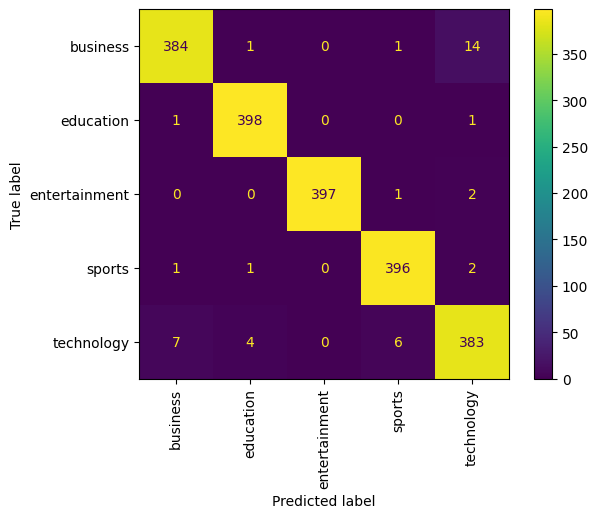

In [10]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.xticks(rotation=90)
plt.plot()

In [11]:
from sklearn.svm import SVC

model = SVC(kernel="linear")
model.fit(X_train, y_train)

SVC(kernel='linear')

               precision    recall  f1-score   support

     business       0.98      0.96      0.97       400
    education       0.99      0.99      0.99       400
entertainment       1.00      0.99      1.00       400
       sports       0.98      0.99      0.99       400
   technology       0.96      0.96      0.96       400

     accuracy                           0.98      2000
    macro avg       0.98      0.98      0.98      2000
 weighted avg       0.98      0.98      0.98      2000



[]

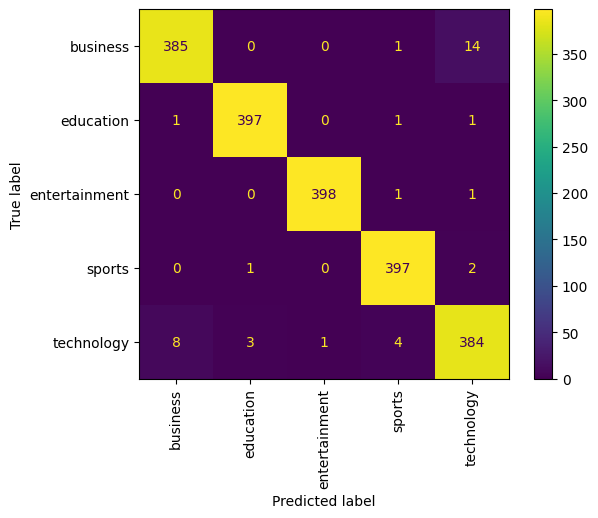

In [12]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.xticks(rotation=90)
plt.plot()